## 주식가격 크롤링

In [24]:
import requests 
from bs4 import BeautifulSoup 
import datetime
import time

URL_TEMPLATE = 'https://finance.yahoo.com/quote/%5EIXIC/history?period1={}&period2={}&interval=1d&filter=history&frequency=1d&includeAdjustedClose=tru'

headers = {'User-Agent': 'Mozilla/5.0'}
interval = datetime.timedelta(days=100)
start_date = datetime.datetime(2018, 2, 22)
end_date = datetime.datetime(2023, 2, 21)

ranges = []
while start_date <= end_date:
    range_start = int(start_date.timestamp())
    range_end = int((start_date + interval).timestamp())
    ranges.append((range_start, range_end))
    start_date += interval

nasdaq_list = []

for period1, period2 in ranges:
    url = URL_TEMPLATE.format(period1, period2)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser') 
    results = soup.select('tbody tr')

    for result in results:
        date = result.select_one('td:nth-child(1)').text
        price = result.select_one('td:nth-child(5)').text

        nasdaq_list.append({
            'date': date,
            'price': price
        })

    time.sleep(10)

nasdaq_list_sorted = sorted(nasdaq_list, key=lambda x: datetime.datetime.strptime(x['date'], '%b %d, %Y'))
print(nasdaq_list_sorted) 

[{'date': 'Feb 21, 2018', 'price': '7,218.23'}, {'date': 'Feb 22, 2018', 'price': '7,210.09'}, {'date': 'Feb 23, 2018', 'price': '7,337.39'}, {'date': 'Feb 26, 2018', 'price': '7,421.46'}, {'date': 'Feb 27, 2018', 'price': '7,330.35'}, {'date': 'Feb 28, 2018', 'price': '7,273.01'}, {'date': 'Mar 01, 2018', 'price': '7,180.56'}, {'date': 'Mar 02, 2018', 'price': '7,257.87'}, {'date': 'Mar 05, 2018', 'price': '7,330.71'}, {'date': 'Mar 06, 2018', 'price': '7,372.01'}, {'date': 'Mar 07, 2018', 'price': '7,396.65'}, {'date': 'Mar 08, 2018', 'price': '7,427.95'}, {'date': 'Mar 09, 2018', 'price': '7,560.81'}, {'date': 'Mar 12, 2018', 'price': '7,588.32'}, {'date': 'Mar 13, 2018', 'price': '7,511.01'}, {'date': 'Mar 14, 2018', 'price': '7,496.81'}, {'date': 'Mar 15, 2018', 'price': '7,481.74'}, {'date': 'Mar 16, 2018', 'price': '7,481.99'}, {'date': 'Mar 19, 2018', 'price': '7,344.24'}, {'date': 'Mar 20, 2018', 'price': '7,364.30'}, {'date': 'Mar 21, 2018', 'price': '7,345.29'}, {'date': 'Ma

In [25]:
import json

# 파일에 저장할 데이터
data = {'nasdaq_list': nasdaq_list_sorted}

# 파일에 데이터를 쓰기
with open('nasdaq_data.json', 'w') as f:
    json.dump(data, f)

In [35]:
import json

# 파일에서 데이터를 읽어오기
with open('nasdaq_data.json', 'r') as f:
    data = json.load(f)

# 데이터 사용하기
nasdaq_list_sorted = data['nasdaq_list']

In [34]:
nasdaq_prices_sorted = [item['price'] for item in nasdaq_list_sorted]

In [33]:
nasdaq_dates_sorted = [item['date'] for item in nasdaq_list_sorted]

## 비트코인 가격

In [18]:
import requests 
from bs4 import BeautifulSoup 
import datetime
import time

URL_TEMPLATE = 'https://finance.yahoo.com/quote/BTC-USD/history?period1={}&period2={}&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'

headers = {'User-Agent': 'Mozilla/5.0'}
interval = datetime.timedelta(days=100)
start_date = datetime.datetime(2018, 2, 21)
end_date = datetime.datetime(2023, 2, 21)

ranges = []
while start_date <= end_date:
    range_start = int(start_date.timestamp())
    range_end = int((start_date + interval).timestamp())
    ranges.append((range_start, range_end))
    start_date += interval

bitcoin_list = []

for period1, period2 in ranges:
    url = URL_TEMPLATE.format(period1, period2)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser') 
    results = soup.select('tbody tr')

    for result in results:
        date = result.select_one('td:nth-child(1)').text
        price = result.select_one('td:nth-child(5)').text

        bitcoin_list.append({
            'date': date,
            'price': price
        })

    time.sleep(10)

bitcoin_list_sorted = sorted(bitcoin_list, key=lambda x: datetime.datetime.strptime(x['date'], '%b %d, %Y'))
print(bitcoin_list_sorted) #2018년 2월 20일부터 2023년 2월 24일까지 가격

[{'date': 'Feb 21, 2018', 'price': '10,690.40'}, {'date': 'Feb 22, 2018', 'price': '10,005.00'}, {'date': 'Feb 23, 2018', 'price': '10,301.10'}, {'date': 'Feb 24, 2018', 'price': '9,813.07'}, {'date': 'Feb 25, 2018', 'price': '9,664.73'}, {'date': 'Feb 26, 2018', 'price': '10,366.70'}, {'date': 'Feb 27, 2018', 'price': '10,725.60'}, {'date': 'Feb 28, 2018', 'price': '10,397.90'}, {'date': 'Mar 01, 2018', 'price': '10,951.00'}, {'date': 'Mar 02, 2018', 'price': '11,086.40'}, {'date': 'Mar 03, 2018', 'price': '11,489.70'}, {'date': 'Mar 04, 2018', 'price': '11,512.60'}, {'date': 'Mar 05, 2018', 'price': '11,573.30'}, {'date': 'Mar 06, 2018', 'price': '10,779.90'}, {'date': 'Mar 07, 2018', 'price': '9,965.57'}, {'date': 'Mar 08, 2018', 'price': '9,395.01'}, {'date': 'Mar 09, 2018', 'price': '9,337.55'}, {'date': 'Mar 10, 2018', 'price': '8,866.00'}, {'date': 'Mar 11, 2018', 'price': '9,578.63'}, {'date': 'Mar 12, 2018', 'price': '9,205.12'}, {'date': 'Mar 13, 2018', 'price': '9,194.85'}, 

In [26]:
import json

# 파일에 저장할 데이터
data = {'bitcoin_list': bitcoin_list_sorted}

# 파일에 데이터를 쓰기
with open('bitcoin_data.json', 'w') as f:
    json.dump(data, f)

In [49]:
import json

# 파일에서 데이터를 읽어오기
with open('bitcoin_data.json', 'r') as f:
    data = json.load(f)

# 데이터 사용하기
bitcoin_list_sorted = data['bitcoin_list']

In [40]:
bitcoin_dates_sorted = [item['date'] for item in bitcoin_list_sorted]

In [37]:
bitcoin_prices_sorted = [item['price'] for item in bitcoin_list_sorted]

## 한번에 두개 그래프 그리기

ValueError: x and y must have same first dimension, but have shapes (1835,) and (1276,)

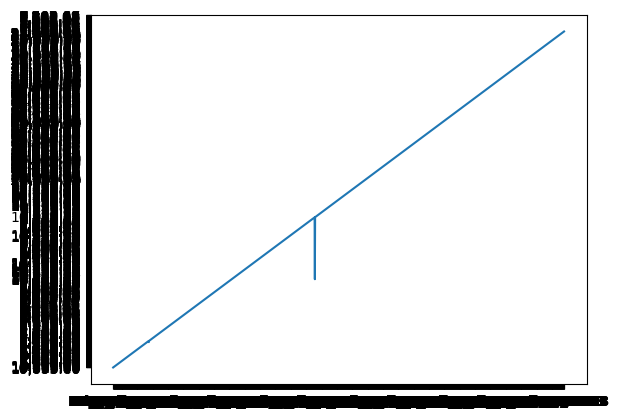

In [45]:
import matplotlib.pyplot as plt

# 그래프 데이터
x = bitcoin_dates_sorted # 일대일 대응이 안되서 그런가벼
y1 = bitcoin_prices_sorted
y2 = nasdaq_prices_sorted

# 그래프 그리기
plt.plot(x, y1, label='bitcoin')  # y1 그래프
plt.plot(x, y2, label='nasdaq') # y2 그래프


# 그래프 설정
plt.title('주식과 비트코인 가격 간의 상관관계')  # 그래프 제목
plt.xlabel('date')  # x축 라벨
plt.ylabel('price')  # y축 라벨
plt.plot(year, y1, label = "bitcoin", color="green") #이름으로 색 바꾸기 
plt.plot(year, y2, label = "nasdaq", color = "hotpink") 
plt.legend()  # 범례 표시

# 그래프 출력
plt.show()
